# Hospital Readmissions Data Analysis and Recommendations for Reduction

### Background
In October 2012, the US government's Center for Medicare and Medicaid Services (CMS) began reducing Medicare payments for Inpatient Prospective Payment System hospitals with excess readmissions. Excess readmissions are measured by a ratio, by dividing a hospital’s number of “predicted” 30-day readmissions for heart attack, heart failure, and pneumonia by the number that would be “expected,” based on an average hospital with similar patients. A ratio greater than 1 indicates excess readmissions.

### Exercise Directions

In this exercise, you will:
+ critique a preliminary analysis of readmissions data and recommendations (provided below) for reducing the readmissions rate
+ construct a statistically sound analysis and make recommendations of your own 

More instructions provided below. Include your work **in this notebook and submit to your Github account**. 

### Resources
+ Data source: https://data.medicare.gov/Hospital-Compare/Hospital-Readmission-Reduction/9n3s-kdb3
+ More information: http://www.cms.gov/Medicare/medicare-fee-for-service-payment/acuteinpatientPPS/readmissions-reduction-program.html
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import bokeh.plotting as bkp
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [2]:
# read in readmissions data provided
hospital_read_df = pd.read_csv('data/cms_hospital_readmissions.csv')

****
## Preliminary Analysis

In [3]:
# deal with missing and inconvenient portions of data 
clean_hospital_read_df = hospital_read_df[hospital_read_df['Number of Discharges'] != 'Not Available']
clean_hospital_read_df.loc[:, 'Number of Discharges'] = clean_hospital_read_df['Number of Discharges'].astype(int)
clean_hospital_read_df = clean_hospital_read_df.sort_values('Number of Discharges')

/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


In [4]:
clean_hospital_read_df.head()

,Hospital Name,Provider Number,State,Measure Name,Number of Discharges,Footnote,Excess Readmission Ratio,Predicted Readmission Rate,Expected Readmission Rate,Number of Readmissions,Start Date,End Date
16857,THREE RIVERS MEDICAL CENTER,180128,KY,READM-30-HIP-KNEE-HRRP,0,7.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013
14582,SELLS INDIAN HEALTH SERVICE HOSPITAL,30074,AZ,READM-30-COPD-HRRP,0,7.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013
15606,PHS INDIAN HOSPITAL AT PINE RIDGE,430081,SD,READM-30-AMI-HRRP,0,7.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013
15615,FLORIDA STATE HOSPITAL UNIT 31 MED,100298,FL,READM-30-COPD-HRRP,0,7.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013
14551,GREENE COUNTY HOSPITAL,10051,AL,READM-30-AMI-HRRP,0,7.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013


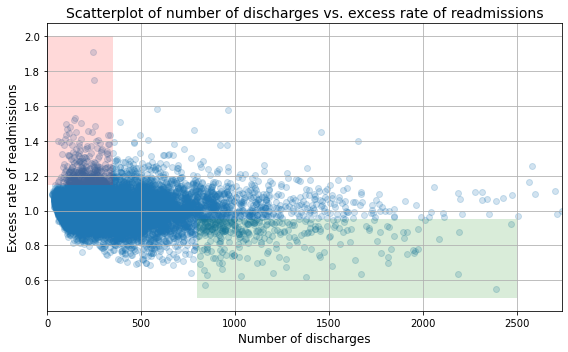

In [5]:
# generate a scatterplot for number of discharges vs. excess rate of readmissions
# lists work better with matplotlib scatterplot function
x = [a for a in clean_hospital_read_df['Number of Discharges'][81:-3]]
y = list(clean_hospital_read_df['Excess Readmission Ratio'][81:-3])

fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(x, y,alpha=0.2)

ax.fill_between([0,350], 1.15, 2, facecolor='red', alpha = .15, interpolate=True)
ax.fill_between([800,2500], .5, .95, facecolor='green', alpha = .15, interpolate=True)

ax.set_xlim([0, max(x)])
ax.set_xlabel('Number of discharges', fontsize=12)
ax.set_ylabel('Excess rate of readmissions', fontsize=12)
ax.set_title('Scatterplot of number of discharges vs. excess rate of readmissions', fontsize=14)

ax.grid(True)
fig.tight_layout()

****

## Preliminary Report

Read the following results/report. While you are reading it, think about if the conclusions are correct, incorrect, misleading or unfounded. Think about what you would change or what additional analyses you would perform.

**A. Initial observations based on the plot above**
+ Overall, rate of readmissions is trending down with increasing number of discharges
+ With lower number of discharges, there is a greater incidence of excess rate of readmissions (area shaded red)
+ With higher number of discharges, there is a greater incidence of lower rates of readmissions (area shaded green) 

**B. Statistics**
+ In hospitals/facilities with number of discharges < 100, mean excess readmission rate is 1.023 and 63% have excess readmission rate greater than 1 
+ In hospitals/facilities with number of discharges > 1000, mean excess readmission rate is 0.978 and 44% have excess readmission rate greater than 1 

**C. Conclusions**
+ There is a significant correlation between hospital capacity (number of discharges) and readmission rates. 
+ Smaller hospitals/facilities may be lacking necessary resources to ensure quality care and prevent complications that lead to readmissions.

**D. Regulatory policy recommendations**
+ Hospitals/facilties with small capacity (< 300) should be required to demonstrate upgraded resource allocation for quality care to continue operation.
+ Directives and incentives should be provided for consolidation of hospitals and facilities to have a smaller number of them with higher capacity and number of discharges.

****
### Exercise

Include your work on the following **in this notebook and submit to your Github account**. 

A. Do you agree with the above analysis and recommendations? Why or why not?
   
B. Provide support for your arguments and your own recommendations with a statistically sound analysis:

   1. Setup an appropriate hypothesis test.
   2. Compute and report the observed significance value (or p-value).
   3. Report statistical significance for $\alpha$ = .01. 
   4. Discuss statistical significance and practical significance. Do they differ here? How does this change your recommendation to the client?
   5. Look at the scatterplot above. 
      - What are the advantages and disadvantages of using this plot to convey information?
      - Construct another plot that conveys the same information in a more direct manner.



You can compose in notebook cells using Markdown: 
+ In the control panel at the top, choose Cell > Cell Type > Markdown
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

In [6]:
# Your turn

### Question 1

**A. Initial observations based on the plot above**
+ Overall, rate of readmissions is trending down with increasing number of discharges
    + True
+ With lower number of discharges, there is a greater incidence of excess rate of readmissions (area shaded red)
    + True<br>
        + Mean in red square had 0.281 more readmission rate than overall
+ With higher number of discharges, there is a greater incidence of lower rates of readmissions (area shaded green) 
    + True
        + Mean in blue square had 0.146 less readmission rate than overall

In [15]:
import numpy as np

m,b = np.polyfit(x,y,1)
print("The slope of whole graph:" + str(m))

The slope of whole graph:-2.8565052943822478e-05


In [29]:
red = clean_hospital_read_df.loc[(clean_hospital_read_df['Number of Discharges'] >= 0) & 
                                 (clean_hospital_read_df['Number of Discharges'] <= 350) & 
                                 (clean_hospital_read_df['Excess Readmission Ratio'] >= 1.2) &
                                 (clean_hospital_read_df['Excess Readmission Ratio'] <= 2) ]
blue = clean_hospital_read_df.loc[(clean_hospital_read_df['Number of Discharges'] >= 800) & 
                                  (clean_hospital_read_df['Number of Discharges'] <= 2500) &
                                  (clean_hospital_read_df['Excess Readmission Ratio'] >= 0.5) &
                                  (clean_hospital_read_df['Excess Readmission Ratio'] <= 0.95) ]

In [90]:
data_mean = clean_hospital_read_df['Excess Readmission Ratio'].mean()
print("Mean of Entire Readmission: " + str(data_mean))

Mean of Entire Readmission: 1.0075037835957146


In [91]:
redbox_mean = red['Excess Readmission Ratio'].mean()
print("Mean of Readmission in red squre: " + str(redbox_mean))
print("Difference general - red: " + str(data_mean - redbox_mean))

Mean of Readmission in red squre: 1.2886351351351353
Difference general - red: -0.2811313515394207


In [96]:
bluebox_mean = blue['Excess Readmission Ratio'].mean()
print("Mean of Excess Readmission in blue squre: " + str(bluebox_mean))
print("Difference general - blue: " + str(data_mean - bluebox_mean))

Mean of Excess Readmission in blue squre: 0.8619441860465118
Difference general - blue: 0.14555959754920278


**B. Statistics**
+ In hospitals/facilities with number of discharges < 100, mean excess readmission rate is 1.023 and 63% have excess readmission rate greater than 1 
    + False
        + Readmission ratio is 1.023, but 59% had excess readmission rate greater than 1
+ In hospitals/facilities with number of discharges > 1000, mean excess readmission rate is 0.978 and 44% have excess readmission rate greater than 1 
    + True


In [39]:
less100_dis_df = clean_hospital_read_df.loc[clean_hospital_read_df['Number of Discharges'] < 100]
over1000_dis_df = clean_hospital_read_df.loc[clean_hospital_read_df['Number of Discharges'] > 1000]

In [97]:
less100_readmission_mean = less100_dis_df['Excess Readmission Ratio'].mean()
less100_dis_df_over_one = less100_dis_df.loc[less100_dis_df['Excess Readmission Ratio'] > 1]
over_one_less100 = less100_dis_df_over_one['Excess Readmission Ratio'].size
entire_less100 = less100_dis_df['Excess Readmission Ratio'].size
print("Less than 100 discharges")
print("Percentage of Excess Readmission over 1: " + str(over_one_less100/entire_less100*100) + "%")
print("Mean of Readmission rate: " + str(less100_readmission_mean))

Less than 100 discharges
Percentage of Excess Readmission over 1: 59.18045705279747%
Mean of Readmission rate: 1.0226183501683506


In [98]:
over1000_readmission_mean = over1000_dis_df['Excess Readmission Ratio'].mean()
over1000_dis_df_over_one = over1000_dis_df.loc[over1000_dis_df['Excess Readmission Ratio'] > 1]
over_one_over1000 = over1000_dis_df_over_one['Excess Readmission Ratio'].size
entire_over1000 = over1000_dis_df['Excess Readmission Ratio'].size
print("Over than 1000 discharges")
print("Percentage of Excess Readmission over 1: " + str(over_one_over1000/entire_over1000*100) + "%")
print("Mean of Readmission rate: " + str(over1000_readmission_mean))

Over than 1000 discharges
Percentage of Excess Readmission over 1: 44.49244060475162%
Mean of Readmission rate: 0.9783354211663071


**C. Conclusions**
+ There is a significant correlation between hospital capacity (number of discharges) and readmission rates. 
    + Moderate Negative Correlation
+ Smaller hospitals/facilities may be lacking necessary resources to ensure quality care and prevent complications that lead to readmissions.

In [102]:
from scipy import stats as st

no_null = clean_hospital_read_df[clean_hospital_read_df['Excess Readmission Ratio'].notnull()]
corr, p = st.pearsonr(x = no_null['Number of Discharges'],y = no_null['Excess Readmission Ratio'])
print("Correlation between Number of Discharges and Excess Readmission Ratio: " + format(corr))
print("p value: " + format(p))

Correlation between Number of Discharges and Excess Readmission Ratio: -0.09739794351079364
p value: 1.2225473776801568e-25


It has weak negative correlation of -0.097<br>
The p value is 1.2e-25, and confidence level is 0.01, so it is statistically significant

**D. Regulatory policy recommendations**
+ Hospitals/facilties with small capacity (< 300) should be required to demonstrate upgraded resource allocation for quality care to continue operation.
    + We reject null hypothesis of small hospital has same mean of excess of readmission ratio. Therefore, upgraded resources are necessary
+ Directives and incentives should be provided for consolidation of hospitals and facilities to have a smaller number of them with higher capacity and number of discharges.

In [112]:
smallhospital_df = no_null.loc[no_null['Number of Discharges'] < 300]
result = stats.ttest_1samp(a = smallhospital_df['Excess Readmission Ratio'], popmean = data_mean)
pval = result.pvalue
smallhospital_mean = smallhospital_df['Excess Readmission Ratio'].mean()

if pval < 0.01:
    print("p-value: " + str(pval))
    print("Reject null hypotheses")
else:
    print("p-value: " + str(pval))
    print("Failed to reject null hypotheses")
print("Small hospital has excess readmission ratio of:" + 
      str(smallhospital_mean))
print("Difference to entire mean from data: " + str(data_mean - smallhospital_mean))

p-value: 1.8845267849360547e-10
Reject null hypotheses
Small hospital has excess readmission ratio of:1.0142382121807445
Difference to entire mean from data: -0.006734428585029928


We reject that small capacity hospital/facilities has same mean as overall.